<a href="https://colab.research.google.com/github/aryan-27p/frontend_spotify_clone/blob/main/nsestockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --quiet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
#fetch data
data = yf.download('INFY.NS',start='2020-01-01',end='2024-12-31')
# Flatten the MultiIndex columns
data.columns = data.columns.droplevel(1)

data.head()

/tmp/ipython-input-2881604498.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('INFY.NS',start='2020-01-01',end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,633.151123,635.857836,629.456284,631.561499,2112415
2020-01-02,631.303772,636.545282,628.038566,634.912706,5658200
2020-01-03,641.013489,642.732024,630.616374,630.616374,7882938
2020-01-06,634.869690,647.715748,632.850433,641.099379,6519403
2020-01-07,625.460815,638.092005,623.054825,634.139396,7899363


In [3]:
#daily returns
data['Daily Return']=data['Close'].pct_change()

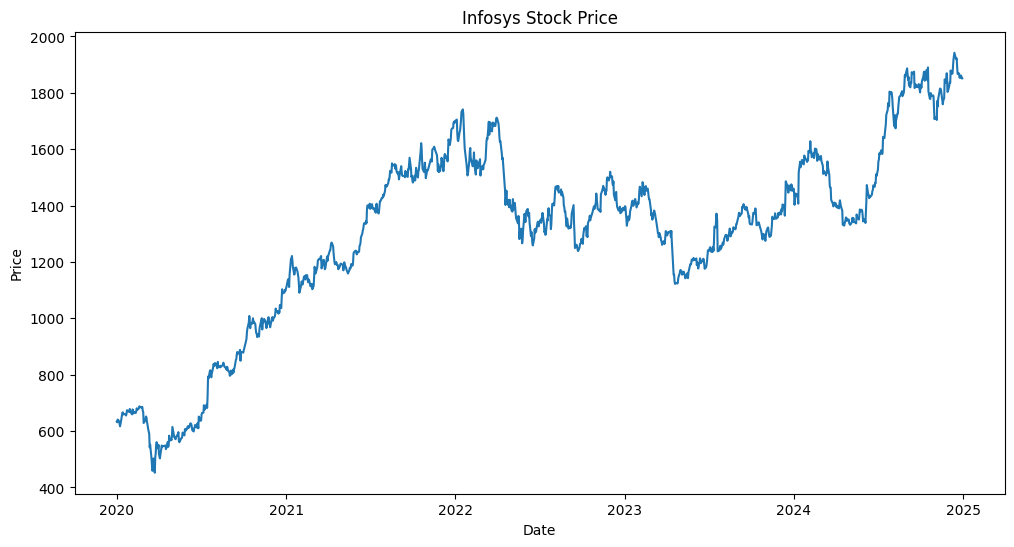

In [5]:
#plot close price
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('Infosys Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

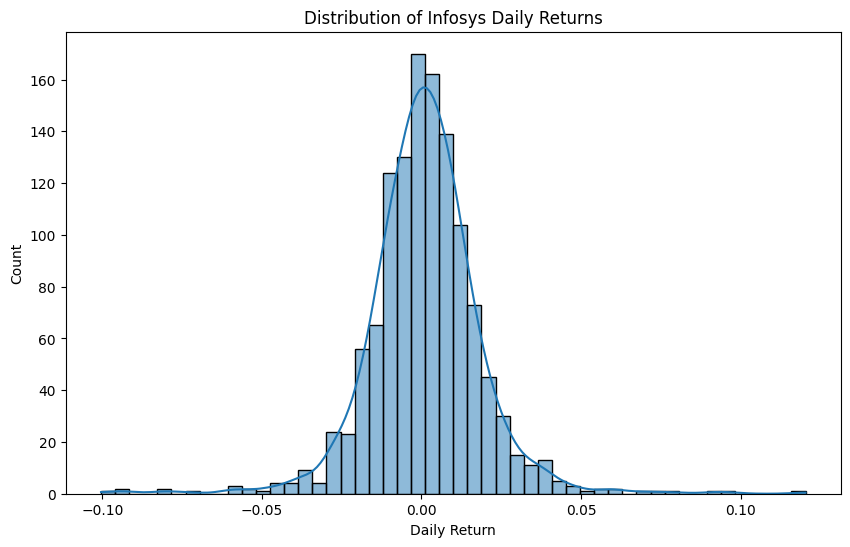

In [6]:
#distribution of returns
plt.figure(figsize=(10,6))
sns.histplot(data['Daily Return'].dropna(),kde=True,bins=50)
plt.title('Distribution of Infosys Daily Returns')
plt.show()

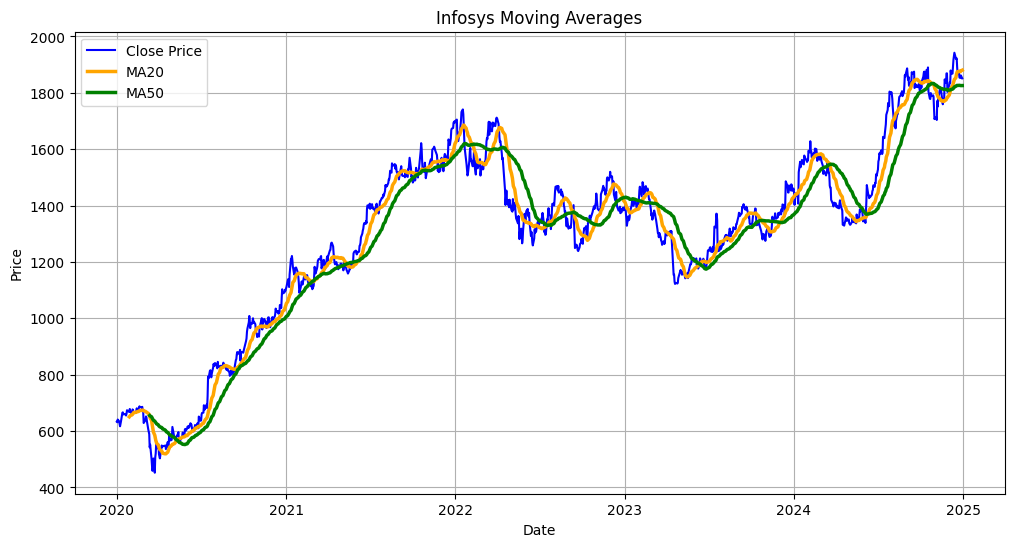

In [18]:
data['MA20'] = data['Close'].rolling(20).mean()
data['MA50'] = data['Close'].rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue', linewidth=1.5)
plt.plot(data['MA20'], label='MA20', color='orange', linewidth=2.5, linestyle='-')
plt.plot(data['MA50'], label='MA50', color='green', linewidth=2.5, linestyle='-')
plt.legend()
plt.title("Infosys Moving Averages")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Let's inspect the `MA20` and `MA50` columns to ensure they contain valid data and are not entirely `NaN`s, which would prevent them from being plotted.

In [15]:
print("Info for MA20 and MA50 columns:")
display(data[['Close', 'MA20', 'MA50']].head(60))
print("\nNumber of non-null values for MA20:", data['MA20'].count())
print("Number of non-null values for MA50:", data['MA50'].count())

Info for MA20 and MA50 columns:


Price,Close,MA20,MA50
Ticker,INFY.NS,,
Date,,,
2020-01-01,633.151123,NaN,NaN
2020-01-02,631.303772,NaN,NaN
2020-01-03,641.013489,NaN,NaN
2020-01-06,634.869690,NaN,NaN
2020-01-07,625.460815,NaN,NaN
2020-01-08,617.125854,NaN,NaN
2020-01-09,625.159973,NaN,NaN
2020-01-10,634.268188,NaN,NaN



Number of non-null values for MA20: 0
Number of non-null values for MA50: 0
